In [318]:
import numpy as np
from numpy import linalg
import random as random
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import math 

In [434]:
sup_ans=[]

In [320]:
def dot_product(v,w):
    x,y = v
    X,Y = w
    return x*X + y*Y

def length_sc(v):
    x,y = v
    return math.sqrt(x*x + y*y)

def produce_vector(b,e):
    x,y = b
    X,Y = e
    return (X-x, Y-y)

def unit_vec(v):
    x,y = v
    mag = length_sc(v)
    return (x/mag, y/mag)

def vec_distance(p0,p1):
    return length_sc(produce_vector(p0,p1))

def vec_scale(v,sc):
    x,y = v
    return (x * sc, y * sc)

def vec_add(v,w):
    x,y = v
    X,Y = w
    return (x+X, y+Y)
def distfunc2(pnt, start, end):
    line_vec = produce_vector(start, end)
    pnt_vec = produce_vector(start, pnt)
    line_len = length_sc(line_vec)
    unit_vector = unit_vec(line_vec)
    scaled_vec = vec_scale(pnt_vec, 1.0/line_len)
    t = dot_product(unit_vector, scaled_vec)    
    if t < 0.0:
        t = 0.0
    elif t > 1.0:
        t = 1.0
    nearest = vec_scale(line_vec, t)
    dist = vec_distance(nearest, pnt_vec)
    return (dist)

In [511]:
x_circ=0
y_circ=250
radius=50
step_size=250
k=10
trials=10000
res1=[0]*(k+1)
res2=[0]*(k+1)

In [400]:
ans=[]
ans1=[]
count_escapes=0
prob=[0]*(k+1)
prob1=[0]*(k+1)
for l in range(trials):
  a=[]
  z=[]
  b=[]
  x_axis=[]
  y_axis=[]
  for j in range(k):
    new=random.uniform(0,360)
    a.append(new)
  for i in range(k):
    x=step_size*math.cos(a[i])
    y=step_size*math.sin(a[i])
    if i==0:
      x_axis.append(0)
      y_axis.append(0)
    else:
      x_axis.append(x+x_axis[i-1])
      y_axis.append(y+y_axis[i-1])
    if i>0:
      # dist_point=math.sqrt((0-x_axis[i])**2+(y_circ-y_axis[i])**2)
      dist_fin=distfunc2((0,y_circ),(x_axis[i-1],y_axis[i-1]),(x_axis[i],y_axis[i]))
      if i==k-1:
              pass_out=math.sqrt((0-x_axis[i])**2+(y_circ-y_axis[i])**2)
              if pass_out>1000:
                count_escapes+=1
      # if dist_point<=50:
      #   ans1.append(i+1)
      #   z.append(i+1)  
      #   break

      if dist_fin<=radius:
          ans.append(i+1)
          b.append(i+1)
          break
  if len(b)==0:
    ans.append(k+1)
  # if len(z)==0:
  #   ans1.append(k+1)  
for i in range(k+1):
  if ans.count(i)==0:
    res1[i]=0
  elif ans.count(i)>0:
    res1[i]=ans.count(i)
for i in range(k+1):
  if ans1.count(i)==0:
    res2[i]=0
  elif ans.count(i)>0:
    res2[i]=ans1.count(i)     
ans1_dnf=ans.count(k+1)
ans_2dnf=ans1.count(k+1)

# Use the above for sense of smell

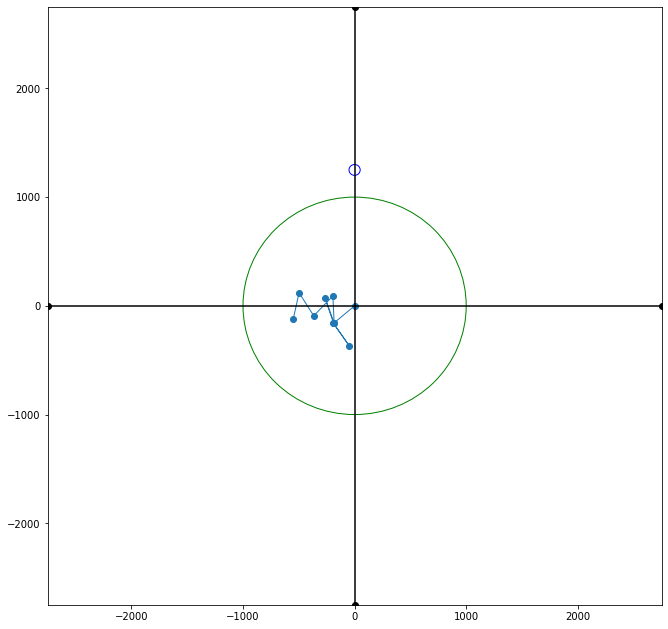

In [377]:
circle2 = plt.Circle((0, y_circ), 50, color='b', fill=False)
circle1 = plt.Circle((0,0), 1000, color='g', fill=False)
fig, ax = plt.subplots()
line = ax.plot(x_axis, y_axis,lw=1,marker='o')

fig.set_size_inches(11, 11)
x1, y1 = [-2750, 2750], [0, 0]
x2, y2 = [0, 0], [2750, -2750]

plt.plot(x1, y1, x2, y2, marker = 'o',color='black')
ax.set_xlim((-2750, 2750))
ax.set_ylim((-2750, 2750))
ax.add_patch(circle2)
ax.add_patch(circle1)

In [378]:
print(pass_out/trials)

0.14798931857604572


In [492]:
ans=[]
ans1=[]
count_escapes=0
prob=[0]*(k+1)
prob1=[0]*(k+1)
for l in range(trials):
  a=[]
  z=[]
  b=[]
  x_axis=[]
  y_axis=[]
  for j in range(k):
    new=random.uniform(0,360)
    a.append(new)
  for i in range(k):
    x=step_size*math.cos(a[i])
    y=step_size*math.sin(a[i])
    if i==0:
      x_axis.append(0)
      y_axis.append(0)
    else:
      x_axis.append(x+x_axis[i-1])
      y_axis.append(y+y_axis[i-1])
    if i>0:
      dist_point=math.sqrt((0-x_axis[i])**2+(y_circ-y_axis[i])**2)
      # dist_fin=distfunc2((0,y_circ),(x_axis[i-1],y_axis[i-1]),(x_axis[i],y_axis[i]))
      if i==k-1:
              pass_out=math.sqrt((0-x_axis[i])**2+(y_circ-y_axis[i])**2)
              if pass_out>1000:
                count_escapes+=1
      if dist_point<=50:
        ans1.append(i+1)
        z.append(i+1)  
        break

      # if dist_fin<=radius:
      #     ans.append(i+1)
      #     b.append(i+1)
      #     break
  # if len(b)==0:
  #   ans.append(k+1)
  if len(z)==0:
    ans1.append(k+1)  
# for i in range(k+1):
#   if ans.count(i)==0:
#     res1[i]=0
#   elif ans.count(i)>0:
#     res1[i]=ans.count(i)
for i in range(k):
  if ans1.count(i)==0:
    res2[i]=0
  elif ans1.count(i)>0:
    res2[i]=ans1.count(i)     
# ans1_dnf=ans.count(k+1)
ans_2dnf=ans1.count(k+1)

In [472]:
print(pass_out/trials)

0.23246883113337238


# Uncomment the above for a test without a functioning sense of smell.

In [429]:
x_val=[]
for i in range(1,k+1):
  x_val.append(i)


In [430]:
for i in range(len(res2)):
  res1[i]=res1[i]/trials

Text(0.5, 1.0, 'With a sense of smell')

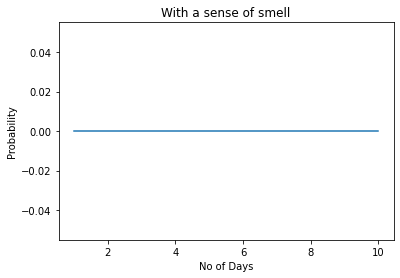

In [431]:
plt.plot(x_val,res1[:-1])
plt.xlabel("No of Days")
plt.ylabel("Probability")
plt.title("With a sense of smell")

In [493]:
sup_ans.append(1-(ans1.count(k+1)/trials))

In [506]:
sup_ans=sup_ans[:-1]

In [500]:
print(sup_ans)

[0.10029999999999994, 0.10089999999999999, 0.030299999999999994, 0.01100000000000001, 0.00990000000000002, 0.0030999999999999917, 0.00039999999999995595, 0.0, 9.999999999998899e-05, 0.0, 0.0, 0.0]


In [502]:
r=0
new=[]
for s in range(10):
  new.append(r)
  r+=250


In [503]:
new.append(2525)

In [509]:
sup_ans.insert(0,1.0)

Text(0.5, 1.0, 'Without a sense of smell')

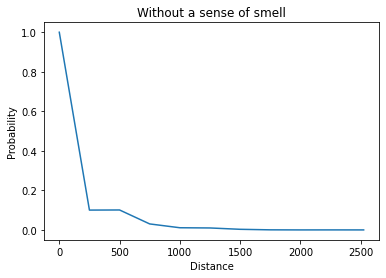

In [510]:
plt.plot(new,sup_ans)
plt.xlabel("Distance")
plt.ylabel("Probability")
plt.title("Without a sense of smell")